# <center> what was happening in last twenty days and do people really care? </center>

Here I use the dataset that I scraped from Google Trend, it contains 400 rows of data which shows the last twenty day's (2018/11/3-2018/11/22) top searchs in United States. Also I used GeneralMills's Google unoffical API to enrich the data for further analysis part.


Three questions are raised here and all of them are related to the anomalies from the dataset that we could see from the first chart(boxplot). And by comparing anomalies and enriching the dataset that related to anomalies, we could do more analysis and gain some insights. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("US_Topsearch.csv")
len(df)

400

In [3]:
dfc = df.drop_duplicates(subset = 'Date'and 'title') # cleaning the data
dfc.to_csv('cleaned_US_Topsearch.csv', encoding='utf-8', index=False)

In [4]:
len(dfc)

365

In [5]:
pd.set_option('display.max_colwidth', -1)
dfc.head()

,Date,rank,title,search,summary,source,link
0,22/11/2018,1,North Sentinel Island,500K+,"American missionary, adventurer killed by tribe members on restricted and ...",USA TODAY | 18h ago,https://www.usatoday.com/story/news/world/2018/11/21/american-believed-killed-isolated-tribe-north-sentinel-island-india/2076608002/
1,22/11/2018,2,LFO,200K+,LFO Singer Devin Lima Dies at 41,Variety | 11h ago,https://variety.com/2018/music/news/devin-lima-dead-dies-lfo-1203034421/
2,22/11/2018,3,Happy Thanksgiving,200K+,"'Happy Thanksgiving,' Netanyahu wishes Americans in video",The Times of Israel | 5h ago,https://www.timesofisrael.com/happy-thanksgiving-netanyahu-wishes-americans-in-video/
3,22/11/2018,4,Square One,100K+,Colts Neck fire: Keith Caneiro brother Paul was first hire for fledgling tech ...,Asbury Park Press | 11h ago,https://www.app.com/story/news/crime/jersey-mayhem/2018/11/21/colts-neck-fire-keith-caneiro-and-brother-had-booming-tech-business/2077238002/
4,22/11/2018,5,Joyner Lucas,100K+,Hip-Hop Reacts to Tory Lanez and Joyner Lucas' Diss Tracks,XXLMAG.COM | 11h ago,http://www.xxlmag.com/news/2018/11/hip-hop-reacts-tory-lanez-joyner-lucas-diss-tracks/


In [6]:
dfc['search'].value_counts()

100K+    114
200K+    82 
50K+     80 
500K+    41 
2M+      21 
1M+      19 
5M+      4  
10M+     3  
20K+     1  
Name: search, dtype: int64

In [7]:
# convert the original string to interget, also make the size/10000 for further analysis
def convert(x):
    return{
        '10M+':1000,
        '5M+':500,
        '2M+':200,
        '1M+':100,
        '500K+':50,
        '200K+':20,
        '100K+':10,
        '50K+':5,
        '20K+':2
    }[x]
    
dfc['searchs'] = dfc['search'].apply(convert)

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<center>The end of data preparation</center>

***

<center>Start to analysis</center>

In [18]:
pd.options.display.float_format = "{:.2f}".format
dfc['searchs'].describe()
#here we could caluate the outlier values of searchs(Q3+1.5iqr = 35)

count   365.00 
mean    44.75  
std     110.54 
min     2.00   
25%     10.00  
50%     10.00  
75%     20.00  
max     1000.00
Name: searchs, dtype: float64

Text(0.05, 885, 'three most obvious anomalies(search value=10M+)')

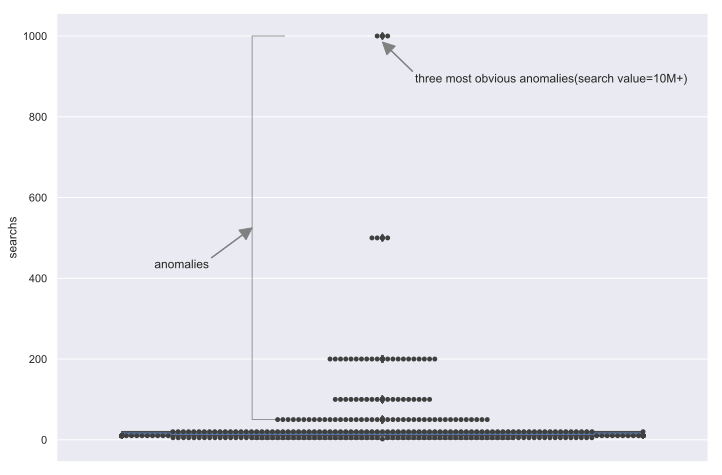

In [17]:
#draw a boxplot of searchs values
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y=dfc['searchs'], data = dfc)
sns.swarmplot(y=dfc['searchs'], data=dfc, color=".25") 
plt.plot([-0.15,-0.2,-0.2,-0.15], [50, 50, 1000, 1000], lw=0.8, c='k',color='grey')
plt.annotate('anomalies', xy=(-0.2, 525), xytext=(-0.35, 425),fontsize=12,
            arrowprops=dict(color='grey', width=0.5))
plt.annotate('three most obvious anomalies(search value=10M+)', xy=(0, 985), xytext=(0.05, 885),fontsize=12,
            arrowprops=dict(color='grey', width=0.5))

# <center> #1 What do US people care the most in last twenty days?</center>

In the above boxplot that drew from search values, we could spot there are three obvious outliers. What do people searchs the most? We could draw the conclusion from the three most obvious anomalies here:


In [42]:
dfc.sort_values(by ='searchs', ascending = False).head(3)

,Date,rank,title,search,summary,source,link,searchs
321,6/11/2018,2,where Do I vote #Electionday,10M+,"How Google, Apple, Facebook and other tech companies are getting out the vote ...",CNBC | 6d ago,https://www.cnbc.com/2018/11/06/google-facebook-and-twitter-election-day-get-out-the-vote-efforts.html,1000
320,6/11/2018,1,Election results,10M+,"Election results: Red states get redder, blue districts bluer, the partisan ...",USA TODAY | 5d ago,https://www.usatoday.com/story/news/politics/elections/2018/11/07/election-results-trump-partisanship-republicans-democrats-divide/1918468002/,1000
180,13/11/2018,1,Stan Lee,10M+,"Stan Lee, Marvel Comics' Real-Life Superhero, Dies at 95",Hollywood Reporter | 12h ago,https://www.hollywoodreporter.com/heat-vision/stan-lee-dead-marvel-comics-real-life-superhero-was-95-721450,1000


Three anomalies are 'where Do I vote #Electionday', 'Election results' and 'Stan Lee'.

So in the past twenty days, people's attentions focus on these subjects. It may because of the approaching date of middle term election and the pass away of Stan Lee.


***

# <center> #2 Stan Lee is as important as Election to Americans? </center>

It seems the searchs of Stan Lee and Election are at the same weight (10M+), so did people value the same about Stan Lee and Election? 

Analysis method: In total 365 search queries, I combine the search titles that contains the very words 'Stan Lee' and 'election' in order to see the related searchs queries. Because people may structure their query differently for same search purpose( e.g. '2018 united states election results' and 'election results 2018').


In [12]:
# queries contains key word 'stan lee'
Stan_Lee = dfc[dfc['title'].str.lower().str.contains('stan lee')]
# sum up the total searchs
Stan_Lee['searchs'].sum() 

1000

In [13]:
# queries contains key word 'election'
election = dfc[dfc['title'].str.lower().str.contains('election')]
# sum up the total searchs
election['searchs'].sum() 

3170

Through at first glance people care the same about Stan Lee and election, but it's not ture, the election searchs (31.7M+) is over three times higher than Stan Lee (10M+).


***

# <center> #3 when people talks about election in US, what do they really mean?</center>

To analysis the related quries of 'election United States' to spot the related key words with high frequency. Here I adopt GeneralMills's Google unoffical API, it could 'Create payload and capture API tokens' for input keywords, and I use the function that get related queries of 'election United States'.
 
analysis method: The embeded related_queries_dict function will print a dictionary of dataframes of key word 'election United States', and it contains two dataframes: the top related queries and rising related queries, each of them contains the query itself and the query searchs values(weight). If I want to analysis word frequency in the two dataframes, I need to add the weights to every queries and combine them together to text file.


In [ ]:
from pytrends.request import TrendReq

# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

In [15]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['election United States'])

In [36]:
# Related Queries, returns a dictionary of dataframes 
related_queries_dict = pytrend.related_queries()

In [45]:
words = related_queries_dict.get('election United States')
top = words.get('top')
#top.to_csv('top.csv', encoding='utf-8', index=False)
top.head(8)

,query,value
0,2016 election,100
1,election united states 2016,100
2,united states election 2016,98
3,election vote,89
4,vote,87
5,2016 vote,85
6,where do i vote,83
7,where do i vote in the 2016 united states election #everyonein2016,83


In [46]:
rising = words.get('rising')
#rising.to_csv('rising.csv', encoding='utf-8', index=False)
rising.head(8)

,query,value
0,2016 vote,5276700
1,where do i vote,5151650
2,where do i vote in the 2016 united states election #everyonein2016,5124100
3,united states 2016 presidential election results,400300
4,2016 presidential election results,399700
5,where to vote in the 2016 united states election,262100
6,donald trump,124250
7,2016 election polls,115700



we can spot there are some same queries in 'top' and in 'rising', so we could convert the searching value in two dataframes use same measurement. "where do i vote in the 2016 united states election #everyonein2016" weights 85, 5276700 in 'top' and 'rising' respectively, so we can apply the below function:


In [47]:
def convert(x): 
    return int(x * (85 / 5276700))    

rising['value2'] = rising['value'].apply(convert)

In [48]:
rising.head(8) # here we can confirm our convert by compare the query "election results 2016", it has the same weight(8) in 'top' list and new 'rising' list

,query,value,value2
0,2016 vote,5276700,85
1,where do i vote,5151650,82
2,where do i vote in the 2016 united states election #everyonein2016,5124100,82
3,united states 2016 presidential election results,400300,6
4,2016 presidential election results,399700,6
5,where to vote in the 2016 united states election,262100,4
6,donald trump,124250,2
7,2016 election polls,115700,1


In order to count the word fruencey in the related research quesries, I turn the dataframe with queries and values to text files with queries with different weights


In [49]:
rising_text = (rising['query'] + " ") * rising['value2'] 
rising_text.to_csv('rising_text.txt', sep='\t', index=False)

top_text = (top['query'] + " ") * top['value'] 
top_text.to_csv('top_text.txt', sep='\t', index=False)

In [53]:
import re

all_file = ['top_text.txt','rising_text.txt']
read_all_file = []

for file in all_file:
    f = open(file,"r+")
    contents= f.read().replace('\n', '')
    read_all_file.append(contents)
    all_words = "".join(read_all_file)
    
punctuation="[!@#$%^&*()_+{}:\"<>?,./;“”‘’]+"
words = re.sub(punctuation,' ', all_words) 
words_list = words.split()

stop_words = ["i", "us","do","the","in","of","to","states","united",'election','america'] 
final_word_list = [] 

for word in words_list:
    if word not in stop_words:
        final_word_list.append(word)
        
word_count = pd.Series(final_word_list).value_counts().sort_values(ascending=False)[0:15]   

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


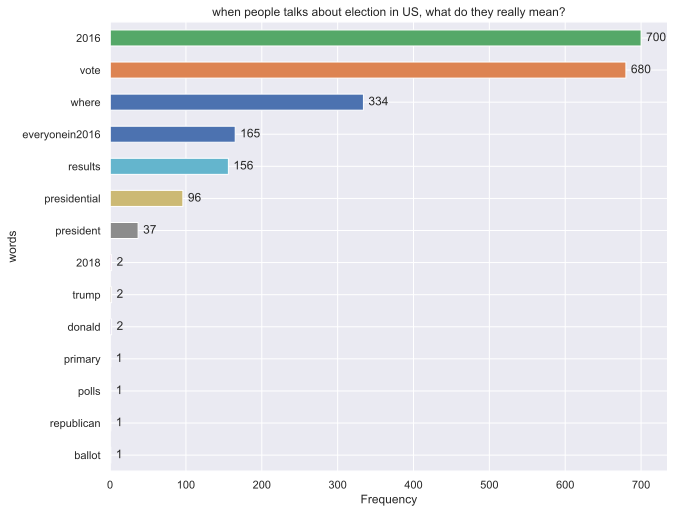

In [55]:
word_count = pd.Series(final_word_list).value_counts().sort_values()[0:15] 
frequencies = word_count.values.tolist()
freq_series = pd.Series.from_array(frequencies)
y_labels = word_count.index.tolist()
plt.figure(figsize=(10,8.27)) 
ax = freq_series.plot(kind='barh')
ax.set_title('when people talks about election in US, what do they really mean?')
ax.set_ylabel('words')
ax.set_xlabel('Frequency')
ax.set_yticklabels(y_labels)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5 # Number of points between bar and label
    label = "{}".format(x_value)
    # Create annotation
    plt.annotate(label, (x_value, y_value),xytext=(space, 0), textcoords="offset points", va='center')               
                            
plt.savefig("barplot.png")

'2016' is the No.1 word, and it's frequency is 350 times higher than '2018'. Here I even didn't count the 4th popular term 'everyonein2016'. 
    

There may be some other interpretations for the huge difference of '2016' and '2018'. Maybe when people search for 'election United States', they expected the results will be up-to-date, so they won't add '2018' in the queries. But if so, at the year 2016, people still won't add '2016' when they search for 'election United States'. Maybe some will say that there are two year's more time for the search '2016' than '2018', but still, it just shows 2016 election's strong afterwave and it's lasting influence. So in all aspects, while people talks about United States election, they are mostly likely to start a conversation related with 2016.


***